In [13]:
import numpy as np
import matplotlib.pyplot as plt
from NumOpt.OptimizationProblem import OptimizationProblem
from NumOpt.post_processing import plot_histories

PROBLEM PARAMETERS

In [14]:
# parameters
b = 0.125
h = 0.250
Sy = 200E6
Ty = 116E6
P = 100e3
l = 1
args = (b, h, Sy, Ty, P, l)

# design variables
twmin = 2E-3
twmax = 25E-3
tbmin = 2E-3
tbmax = 25E-3

tbref = tbmin + (tbmax - tbmin) / 2
twref = twmin + (twmax - twmin) / 2

OBJECTIVE FUNCTION CALCULATION

In [15]:
def total_mass(x, *args):
    tb = x[0]
    tw = x[1]
    b, h, Sy, Ty, P, l = args[0]
    mass = 2 * tb * b + h * tw
    return mass

def intertia_moment(x, *args):
    tb = x[0]
    tw = x[1]
    b, h, Sy, Ty, P, l = args[0]
    moment = h**3 / 12 * tw + b /6 * tb**3 + h**2 * b /2 * tb
    return moment

def axial_stress(x, *args):
    tb = x[0]
    tw = x[1]
    b, h, Sy, Ty, P, l = args[0]
    I = intertia_moment(x, *args)
    margin = P * l * h / 2 / I - Sy
    return margin

def shear_stress(x, *args):
    tb = x[0]
    tw = x[1]
    b, h, Sy, Ty, P, l = args[0]
    margin = 1.5 * P / h / tw - Ty
    return margin

def penalized_function(x, *args):
    # design variables
    tb = x[0]
    tw = x[1]
    
    # reference quantities
    tbref = 12E-3
    twref = 12E-3
    massRef = total_mass([tbref, twref], *args)
    axialStressRef = axial_stress([tbref, twref], *args)
    shearStressRef = shear_stress([tbref, twref], *args)
    
    # build penalized problem
    mu1 = 1
    mu2 = 1
    objFunction = total_mass(x, *args)
    axialStress = axial_stress(x, *args)
    shearStress = shear_stress(x, *args)
    res = objFunction / massRef + mu1 * (axialStress / axialStressRef) ** 2 + mu2 * (shearStress/shearStressRef) ** 2
    return res

### Part 1

Solve the problem at various friction coefficient levels

In [16]:
mu1 = 1e-4
mu2 = 0.01
tol = 1e-6
maxiter = 100

initialGuess = [0.5*(tbmin+tbmax), 0.5*(twmin+twmax)]
prob = OptimizationProblem(nDim=2, bounds=[(tbmin, tbmax), (twmin, twmax)])
prob.setObjectiveFunction(penalized_function, args)
history = prob.solve(x0=initialGuess, directionMethod='quasi_newton', 
                        stepMethod='strong_wolfe', options={'maxiter':maxiter, 'tol':tol, 'mu1':mu1, 'mu2':mu2})

Final solution:
        tb =  0.014297863129425267
        tw =  0.005059638986068306


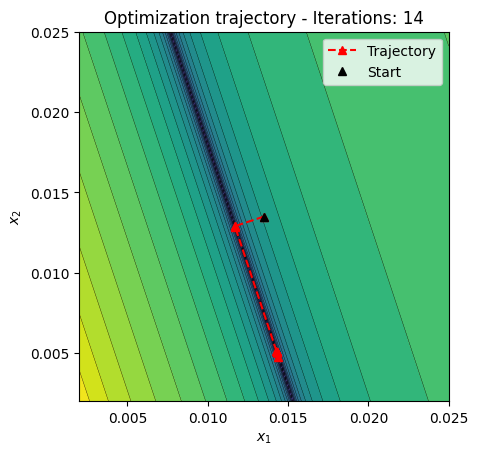

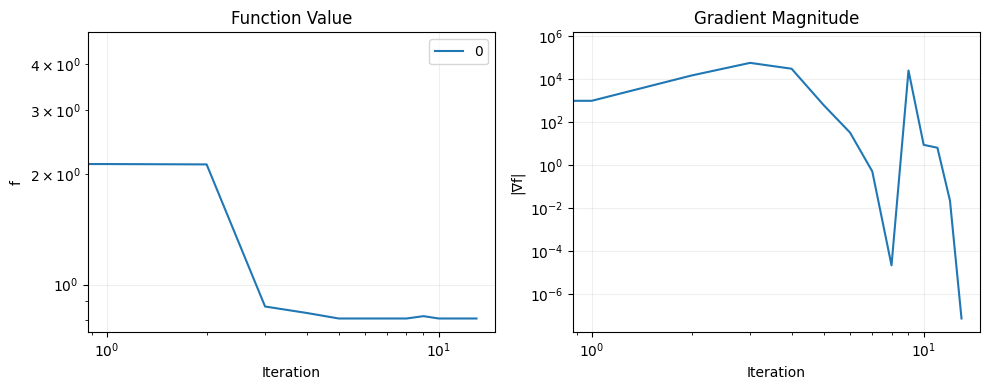

In [18]:
prob.plotSolutionHistory(history, logscale=True)
plot_histories([history], '0.1,0.1', xlog=(True, True), ylog=(True, True))
print('Final solution:')
print('        tb = ', history['x'][-1][0])
print('        tw = ', history['x'][-1][1])

In [22]:
history['fval']

[np.float64(37691.54263983566),
 np.float64(4.478385306153722),
 np.float64(2.1324481377988738),
 np.float64(2.1277221541006313),
 np.float64(0.8713054396135198),
 np.float64(0.8368287413256194),
 np.float64(0.8081096785550934),
 np.float64(0.8080973609710894),
 np.float64(0.8080972884769839),
 np.float64(0.8080972884677804),
 np.float64(0.8200724302485312),
 np.float64(0.8080972899818331),
 np.float64(0.8080972894136366),
 np.float64(0.8080972884677965),
 np.float64(0.8080972884677804)]